### Intro
We chose to analyze the "bestness" of Pittsburgh neighborhoods based on the metric of safety. Our first data set was based on the arrest data of the Pittsburgh area. The selected dataset provided quantitative information such as age, date, and time, as well as categorical data such as race, gender, and descriptions of the infractions. Our other dataset was of the fire incidents in the Pittsburgh area. This dataset provided quantitative data such as the date, time, and number of alarms, as well as the categorical data of the fire type description.

### Metric
As previously mentioned we defined our metric to be safety in regards to crime rates and incidents of fire. We believe fire is an indicator of safety because it can provide a lot of inferred data on the quality and maintenance of housing in the area as well as potential environmental threats. In terms of crime rates, we believe that knowing the amounts of arrests in a given area, especially in regards to population, is indicative on the general safety of the community.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
def seqSearch(name, popNames):
    for i in range(0,len(popNames)):
        if name == popNames[i]:
            return i
    return -1
arrests = pd.read_csv('arrests.csv')
pop = pd.read_csv('total-population.csv')[['Neighborhood','Estimate; Total']]#.groupby('Neighborhood').max()
popNums=pop['Estimate; Total'].to_list()
popNames=pop['Neighborhood'].to_list()
arrests=arrests.groupby('INCIDENTNEIGHBORHOOD').size()
arrestsdict=arrests.to_dict()
arrNums = list(arrestsdict.values())
arrNames = list(arrestsdict.keys())
perCapita=[]
perNames=[]

#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(arrNames[i], popNames)
    if index != -1:
        perCapita.append(arrNums[i]/popNums[index])
        perNames.append(arrNames[i])
        perCapita[count]*=1000
        perCapita[count] = round(perCapita[count], 3)
        count+=1
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
arrestFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Arrests Per 1000 People'])
arrestFramed = arrestFrame.groupby('Neighborhood').max().sort_values('Arrests Per 1000 People',ascending=True)
perCapNames=list(perCapDict.keys())
safetyScoreDict={}
for i in range(0, len(perCapita)):
    safetyScoreDict[perCapNames[i]]=len(perCapita)-i


income = pd.read_csv('aggregate-household-income.csv')#[['Neighborhood','Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars']]
incomeNumsString=income['Estimate'].to_list()
incomeNums=[]
for num in incomeNumsString:
    incomeNums.append(float(num))
incomeNames=income['Neighborhood'].to_list()
perCapita=[]
perNames=[]
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(incomeNames[i], popNames)
    if index != -1:
        perCapita.append(float(int(incomeNums[i]/popNums[index])))
        perNames.append(incomeNames[i])
        count+=1
perCapDict={}

for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
rentFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Average Household Income'])
perCapNames=list(perCapDict.keys())
rentScoreDict={}
for i in range(0, len(perCapita)):
    rentScoreDict[perCapNames[i]]=len(perCapita)-i

fires = pd.read_csv('fire-incidents.csv')
fires_by_neighborhood = fires.groupby('neighborhood').size().sort_values(ascending=False)

firedict=fires_by_neighborhood.to_dict()
fireNums = list(firedict.values())
fireNames = list(firedict.keys())
perCapita=[]
perNames=[]
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(fireNames[i], popNames)
    if index != -1:
        perCapita.append(fireNums[i]/popNums[index])
        perNames.append(fireNames[i])
        perCapita[count]*=1000
        perCapita[count] = round(perCapita[count], 3)
        count+=1
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
fireFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Fires Per 1000 People'])
fireFramed = fireFrame.groupby('Neighborhood').max().sort_values('Fires Per 1000 People',ascending=True)
perCapNames=list(perCapDict.keys())
for i in range(0, len(perCapita)):
    if perCapNames[i] not in safetyScoreDict:
        safetyScoreDict[perCapNames[i]]=len(perCapita)-i
    else:
        safetyScoreDict[perCapNames[i]]+=len(perCapita)-i


for name in safetyScoreDict:
    safetyScoreDict[name]/=2
names=[]
overallScoreDict={}
for name in safetyScoreDict:
    names.append(name)
    if name not in rentScoreDict:
        overallScoreDict[name]=safetyScoreDict[name]
    else:
        overallScoreDict[name]=safetyScoreDict[name]+rentScoreDict[name]

safetyScoreDict=OrderedDict(sorted(safetyScoreDict.items(), key=lambda x: x[1]))
safetyScore = pd.DataFrame(list(safetyScoreDict.items()),columns = ['Neighborhood','Safety Score'])
safetyScore = safetyScore.groupby('Neighborhood').max().sort_values('Safety Score',ascending=False)

rentScoreDict=OrderedDict(sorted(rentScoreDict.items(), key=lambda x: x[1]))
affordScore = pd.DataFrame(list(rentScoreDict.items()),columns = ['Neighborhood','Affordability Score'])
affordScore = affordScore.groupby('Neighborhood').max().sort_values('Affordability Score',ascending=False)

overallScoreDict=OrderedDict(sorted(overallScoreDict.items(), key=lambda x: x[1]))
overallScore = pd.DataFrame(list(overallScoreDict.items()),columns = ['Neighborhood','Overall Score'])
overallScore = overallScore.groupby('Neighborhood').max().sort_values('Overall Score',ascending=False)

<AxesSubplot:xlabel='Neighborhood'>

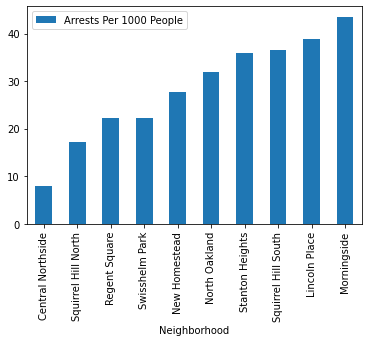

In [4]:
arrestFramed.head(10).plot.bar()

In [3]:
arrestFramed.tail(10)

,Arrests Per 1000 People
Neighborhood,
Strip District,468.541
Fineview,517.323
Allegheny Center,611.623
Homewood West,667.059
Homewood South,677.504
Central Business District,705.911
East Allegheny,750.835
North Shore,2721.951
South Shore,17333.333


<AxesSubplot:xlabel='Neighborhood'>

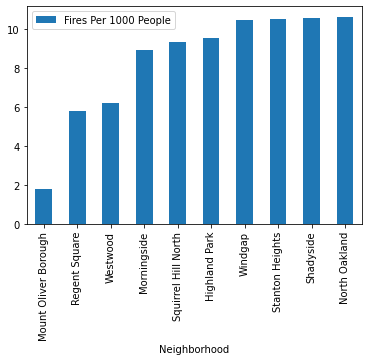

In [5]:
fireFramed.head(10).plot.bar()

In [7]:
fireFramed.tail(10)

,Fires Per 1000 People
Neighborhood,
Esplen,58.252
Strip District,60.241
Beltzhoover,64.042
Homewood South,67.223
Larimer,69.470
West End,72.340
Allegheny West,102.041
North Shore,263.415
South Shore,1583.333


In [18]:
safetyScore.head(10)

,Safety Score
Neighborhood,
Regent Square,85.5
Squirrel Hill North,84.5
Morningside,81.0
Stanton Heights,80.5
Swisshelm Park,80.0
North Oakland,80.0
Shadyside,76.0
Point Breeze,75.5
Greenfield,75.5


<AxesSubplot:xlabel='Neighborhood'>

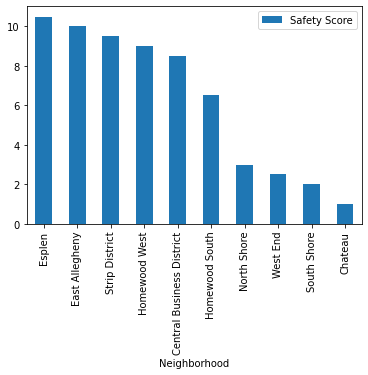

In [10]:
safetyScore.tail(10).plot.bar()

In [14]:
affordScore.head(10)

,Affordability Score
Neighborhood,
Bluff,91
Northview Heights,90
Glen Hazel,89
Terrace Village,88
Bedford Dwellings,87
Arlington Heights,86
West Oakland,85
Central Oakland,84
Larimer,83


In [15]:
affordScore.tail(10)

,Affordability Score
Neighborhood,
Shadyside,10
Regent Square,9
Squirrel Hill North,8
Central Business District,7
Point Breeze,6
North Shore,5
Allegheny West,4
Strip District,3
South Shore,2


<AxesSubplot:xlabel='Neighborhood'>

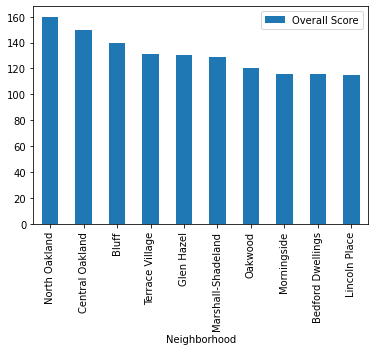

In [16]:
overallScore.head(10).plot.bar()

<AxesSubplot:xlabel='Neighborhood'>

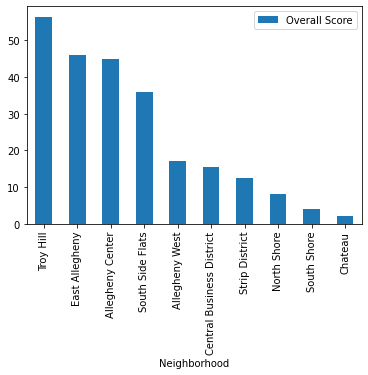

In [17]:
overallScore.tail(10).plot.bar()

### Conclusion
After analyzing our datasets we have come to the conclusion that North Oakland is the "best" neighborhood in Pittsburgh. Looking at the arrests data, Central Northside appeared to be the safest neighborhood in terms of having the least amount of arrests. In regards to the fire data, Regent Square appeared to be the safest neighborhood having the least amount of fire incidents. After combining our datasets we decided that North Oakland is the neighborhood that best satisfies our metric for "bestness".